#### 

##### Deep Learning

### Done by Wael Farag


## Project: Build a Traffic Sign Recognition Classifier


This script is mainly to Biuld the CNN "WAF_LeNet_v1" and train it using the supplied German traffic-sign images. 

### Step 0: Load The Data

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pickle
import cv2
import os
import random as rnd
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

%matplotlib inline

Data_path  = "C:/work/MyFiles/Research/DeepLearning/CarND/TrafficSign/traffic-signs-data/"
Model_path = "C:/work/MyFiles/Research/DeepLearning/CarND/TrafficSign/traffic-signs-model/"

EPOCHS = 25
BATCH_SIZE = 128
LEARNING_RATE = 0.0002                    # learning rate
PKEEP = 0.75                              # keep probability for dropout layer for training

file1 = open(Model_path + 'Training_Results.txt', 'a')
file1.writelines("\nTraining with Grey Scale Images - No Gaussian Blur - Max/Avg Pool")
file1.writelines("FC1 = 300, FC2 = 150 - Dropout (0.75) - learning rate = 0.0002 ...\n\n\n")
file1.close()

# Get the training and testing data
training_file   = Data_path + "train.p"
validation_file = Data_path + "valid.p"
testing_file    = Data_path + "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Step 1: Dataset Summary & Exploration

In [2]:
# Number of training examples
n_train = np.shape(X_train)[0]

# Number of validation examples
n_validation = np.shape(X_valid)[0]

# Number of testing examples.
n_test = np.shape(X_test)[0]

# the shape of an traffic sign image
image_shape = [np.shape(X_train)[1], np.shape(X_train)[2], np.shape(X_train)[3]]

# How many unique classes/labels are in the dataset.
n_classes  = np.shape(np.unique(y_train))[0]
n_classes1 = np.shape(np.unique(y_valid))[0]
n_classes2 = np.shape(np.unique(y_test))[0]

#=======================================================================================
# An exploratory visualization of the dataset


# Visualizations will be shown in the notebook.
#=======================================================================================


                               Training Data Statistics


Number of training examples = 34799
Image data shape = [32, 32, 3]
Number of classes = 43
Average number of samples per class = 809
Class 0 has the minimum number of samples which is 180
Class 2 has the maximum number of samples which is 2010





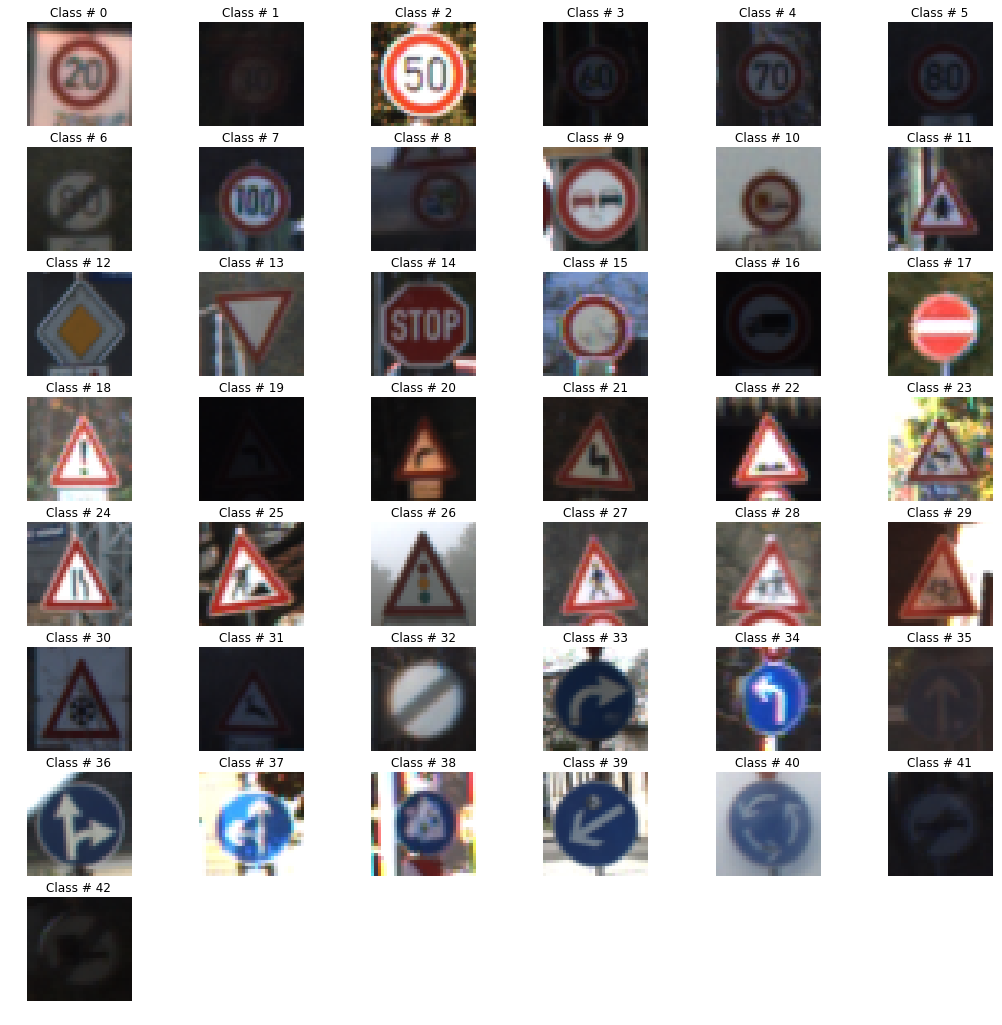

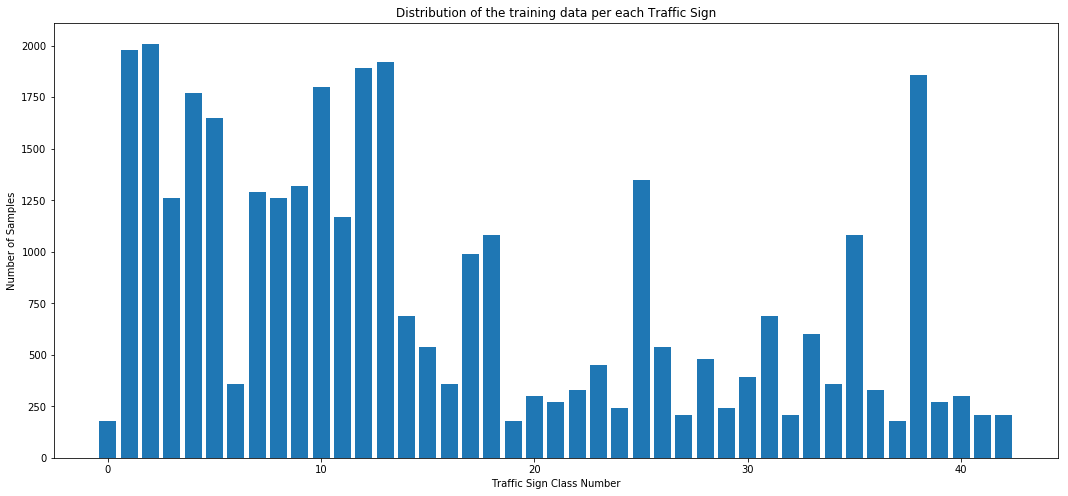

In [3]:
### Data exploration visualization code "Training Data" goes here.

plt.figure(figsize=(18, 18))

Sign_Class_Num_Samples = []
for i in range(0, n_classes):
    Sign_Class = [item for item in range(len(y_train)) if y_train[item] == i]
    Sign_Class_Num_Samples.append(len(Sign_Class))
    plt.subplot(8, 6, i+1)
    plt.imshow(X_train[Sign_Class[rnd.randint(0,len(Sign_Class)-1)],:,:,:])           #draw random sample of each class
    plt.title("Class # {}".format(i))
    plt.axis('off')
    
print("\n                               \033[1m\033[4mTraining Data Statistics\033[0m\n\n")
print("Number of training examples =", n_train)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print('Average number of samples per class =', int(n_train/n_classes))
print("Class {} has the minimum number of samples which is {}".format(Sign_Class_Num_Samples.index(min(Sign_Class_Num_Samples)), min(Sign_Class_Num_Samples)))
print("Class {} has the maximum number of samples which is {}".format(Sign_Class_Num_Samples.index(max(Sign_Class_Num_Samples)), max(Sign_Class_Num_Samples)))
print('\n\n')


# Drawing the number of samples for each class
plt.figure(figsize=(18, 8))
plt.bar(range(0, n_classes), Sign_Class_Num_Samples)
plt.title("Distribution of the training data per each Traffic Sign")
plt.xlabel("Traffic Sign Class Number")
plt.ylabel("Number of Samples")
plt.show()


                               Validation Data Statistics


Number of validation examples = 4410
Image data shape = [32, 32, 3]
Number of classes = 43
Average number of samples per class = 102
Class 0 has the minimum number of samples which is 30
Class 1 has the maximum number of samples which is 240





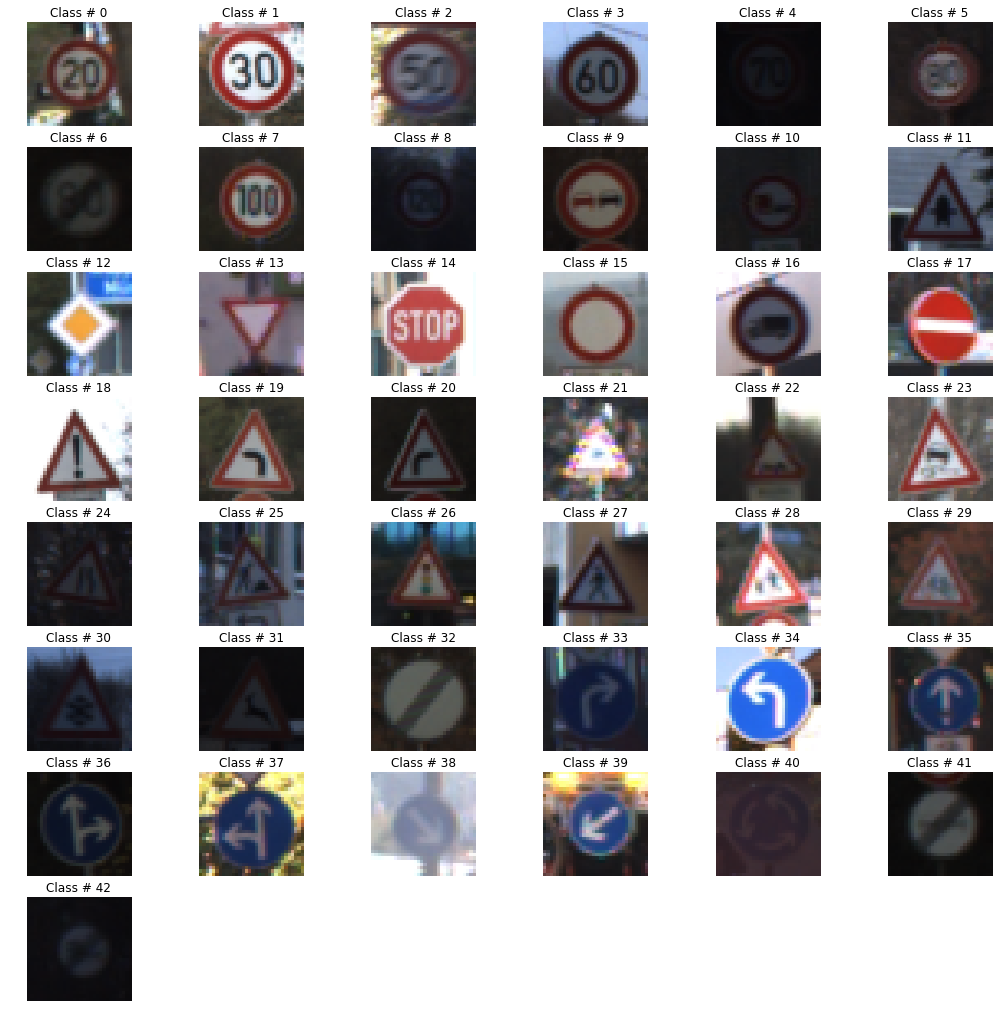

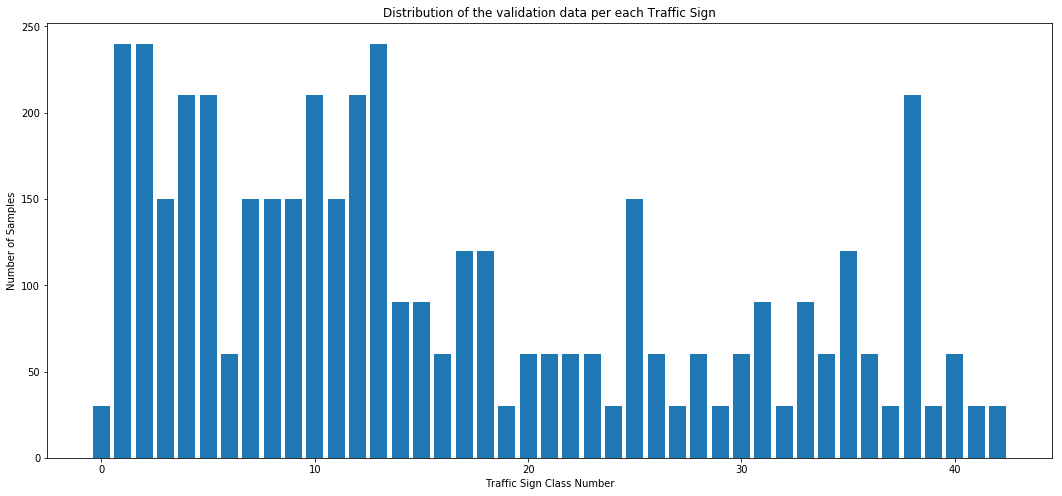

In [4]:
### Data exploration visualization code "Validation Data" goes here.

plt.figure(figsize=(18, 18))

Sign_Class_Num_Samples = []
for i in range(0, n_classes1):
    Sign_Class = [item for item in range(len(y_valid)) if y_valid[item] == i]
    Sign_Class_Num_Samples.append(len(Sign_Class))
    plt.subplot(8, 6, i+1)
    plt.imshow(X_valid[Sign_Class[rnd.randint(0,len(Sign_Class)-1)],:,:,:])           #draw random sample of each class
    plt.title("Class # {}".format(i))
    plt.axis('off')
    
print("\n                               \033[1m\033[4mValidation Data Statistics\033[0m\n\n")
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes1)
print('Average number of samples per class =', int(n_validation/n_classes1))
print("Class {} has the minimum number of samples which is {}".format(Sign_Class_Num_Samples.index(min(Sign_Class_Num_Samples)), min(Sign_Class_Num_Samples)))
print("Class {} has the maximum number of samples which is {}".format(Sign_Class_Num_Samples.index(max(Sign_Class_Num_Samples)), max(Sign_Class_Num_Samples)))
print('\n\n')


# Drawing the number of samples for each class
plt.figure(figsize=(18, 8))
plt.bar(range(0, n_classes1), Sign_Class_Num_Samples)
plt.title("Distribution of the validation data per each Traffic Sign")
plt.xlabel("Traffic Sign Class Number")
plt.ylabel("Number of Samples")
plt.show()


                               Testing Data Statistics


Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43
Average number of samples per class = 293
Class 0 has the minimum number of samples which is 60
Class 2 has the maximum number of samples which is 750





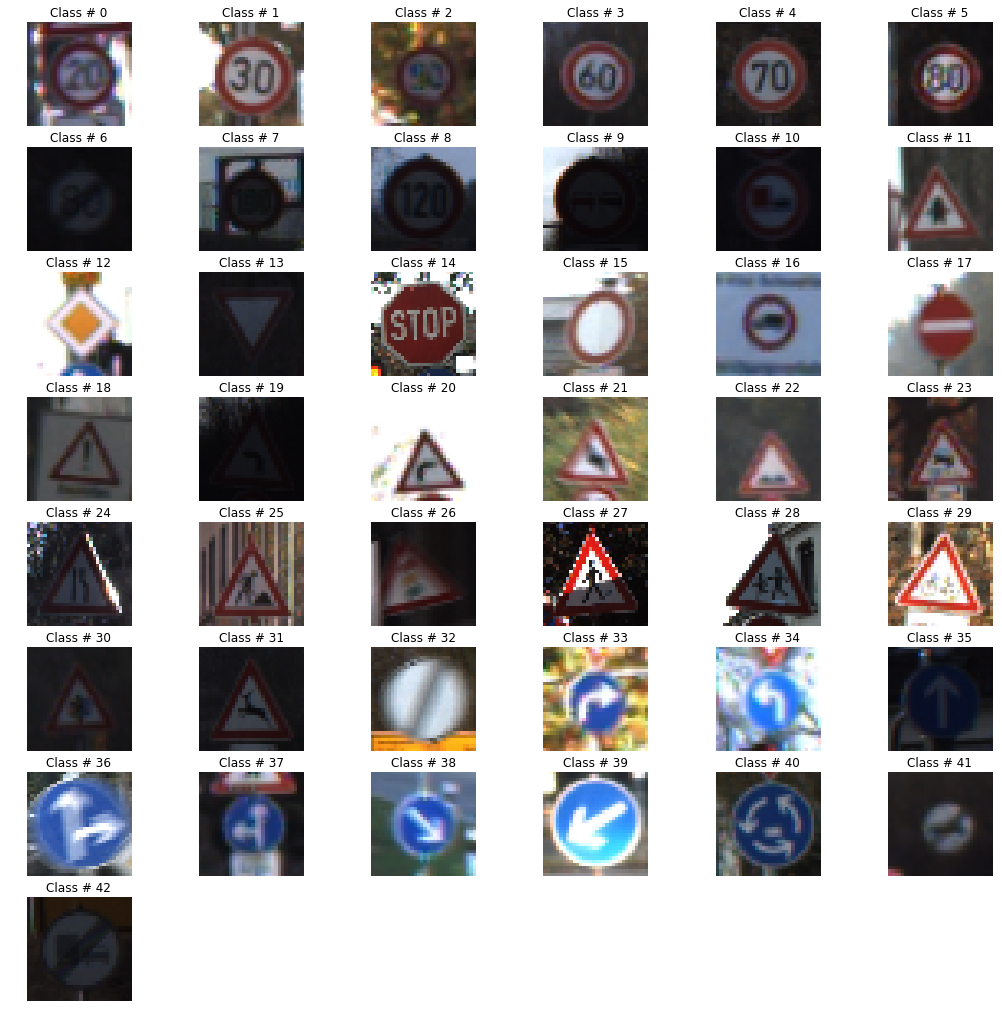

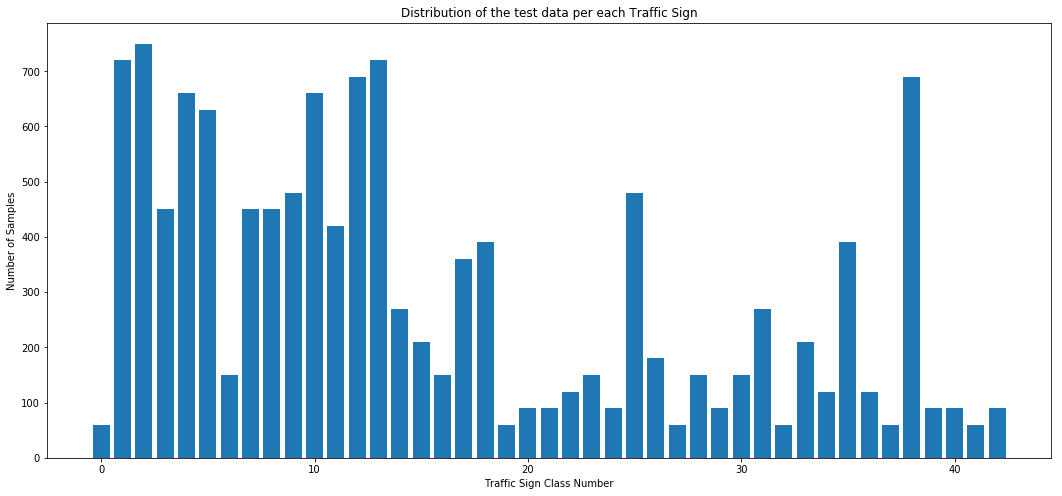

In [5]:
### Data exploration visualization code for "Testing Data" goes here.

plt.figure(figsize=(18, 18))

Sign_Class_Num_Samples = []
for i in range(0, n_classes2):
    Sign_Class = [item for item in range(len(y_test)) if y_test[item] == i]
    Sign_Class_Num_Samples.append(len(Sign_Class))
    plt.subplot(8, 6, i+1)
    plt.imshow(X_test[Sign_Class[rnd.randint(0,len(Sign_Class)-1)],:,:,:])           #draw random sample of each class
    plt.title("Class # {}".format(i))
    plt.axis('off')
    
print("\n                               \033[1m\033[4mTesting Data Statistics\033[0m\n\n")
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes2)
print('Average number of samples per class =', int(n_test/n_classes2))
print("Class {} has the minimum number of samples which is {}".format(Sign_Class_Num_Samples.index(min(Sign_Class_Num_Samples)), min(Sign_Class_Num_Samples)))
print("Class {} has the maximum number of samples which is {}".format(Sign_Class_Num_Samples.index(max(Sign_Class_Num_Samples)), max(Sign_Class_Num_Samples)))
print('\n\n')


# Drawing the number of samples for each class
plt.figure(figsize=(18, 8))
plt.bar(range(0, n_classes2), Sign_Class_Num_Samples)
plt.title("Distribution of the test data per each Traffic Sign")
plt.xlabel("Traffic Sign Class Number")
plt.ylabel("Number of Samples")
plt.show()

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs.

#======================================================================================
### Pre-process the Data Set (normalization, grayscale, etc.)
#======================================================================================


##### Some Function Definitions


In [6]:
# Implement Min-Max scaling for color image data
def normalize_color_image(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    color_min = 0
    color_max = 255
    Normalized_image_data = a + (((image_data - color_min) * (b - a)) / (color_max - color_min))

    return Normalized_image_data

def Convert_Color2Gray(color_image):
    """Applies the Grayscale transform
    This will return an image with only one color channel"""
    return cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)

# Implement Min-Max scaling for gray image data
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    Scaled_image_data = a + (((image_data - grayscale_min) * (b - a)) / (grayscale_max - grayscale_min))

    return Scaled_image_data

def Filter_Blur(image, kernel_size):
    """ Applies a Gaussian Filter to remove Noise """
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

##### Applying the above functions


In [7]:
X_train1 = []
for i in range(0,n_train):
    X_train1.append(Convert_Color2Gray(X_train[i,:,:,:]))

X_train1 = np.array(X_train1)

X_train2 = []
for i in range(0,n_train):
    X_train2.append(normalize_grayscale(X_train1[i,:,:]))
#------------------------------------------------------------------------------------------
X_valid1 = []
for i in range(0,n_validation):
    X_valid1.append(Convert_Color2Gray(X_valid[i,:,:,:]))

X_valid1 = np.array(X_valid1)

X_valid2 = []
for i in range(0,n_validation):
    X_valid2.append(normalize_grayscale(X_valid1[i,:,:]))
#-----------------------------------------------------------------------------------------
X_test1 = []
for i in range(0, n_test):
    X_test1.append(Convert_Color2Gray(X_test[i,:,:,:]))

X_test1 = np.array(X_test1)

X_test2 = []
for i in range(0,n_test):
    X_test2.append(normalize_grayscale(X_test1[i,:,:]))
#-----------------------------------------------------------------------------------------

X_train = np.reshape(X_train2, [n_train, image_shape[0],image_shape[1],1])
X_valid = np.reshape(X_valid2, [n_validation, image_shape[0],image_shape[1],1])
X_test = np.reshape(X_test2, [n_test, image_shape[0],image_shape[1],1])

##### Shuffling Data


In [8]:
X_train, y_train = shuffle(X_train, y_train)

### The Main Function for Network Architecture 

In [9]:
def WAF_LeNet_v1(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1 (grey scale). Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1 , 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', data_format='NHWC', name='Conv1')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.

    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1] , strides=[1, 2, 2, 1], padding='VALID', data_format='NHWC', name='Conv2')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)

    FC1_size = 300                               # First Fully connected Layer
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = FC1_size.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, FC1_size), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(FC1_size))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Added Drop-out Layer here
    fc1 = tf.nn.dropout(fc1, PKEEP)               # pkeep = 0.75

    FC2_size = 150                                # Second Fully connected Layer
    
    # SOLUTION: Layer 4: Fully Connected. Input = FC1_size. Output = FC2_size.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(FC1_size, FC2_size), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(FC2_size))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Added Drop-out Layer here
    fc2 = tf.nn.dropout(fc2, PKEEP)                         # pkeep = 0.75

    # SOLUTION: Layer 5: Fully Connected. Input = FC2_size. Output = 43 (n_classes).
    fc3_W = tf.Variable(tf.truncated_normal(shape=(FC2_size, 43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Defining Features and Labels for Model Evaluation

In [10]:
#================================================================================================
#                                    Features and Labels
#================================================================================================
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
#=================================================================================================
#                                    Training Pipeline
#=================================================================================================
logits = WAF_LeNet_v1(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)
#================================================================================================
#                                       Model Evaluation
#================================================================================================
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

### Evalution Functions

In [11]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### ----------------------------------------  Train the Model -------------------------------------
##### Run the training data through the training pipeline to train the model.
##### Before each epoch, shuffle the training set.
##### After each epoch, measure the loss and accuracy of the validation set.
##### Save the model after training.


In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    saver.restore(sess, tf.train.latest_checkpoint(Model_path + '.'))

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        training_accuracy   = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i + 1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        file1 = open(Model_path + 'Training_Results.txt', 'a')
        file1.writelines("EPOCH {} ...\n".format(i + 1))
        file1.writelines("Training Accuracy = {:.3f}\n".format(training_accuracy))
        file1.close()

        validation_accuracy = evaluate(X_valid, y_valid)
        #print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        file1 = open(Model_path + 'Training_Results.txt', 'a')
        #file1.writelines("EPOCH {} ...\n".format(i + 1))
        file1.writelines("Validation Accuracy = {:.3f}\n".format(validation_accuracy))
        file1.close()

    saver.save(sess, Model_path)
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 1.000
Validation Accuracy = 0.940

EPOCH 2 ...
Training Accuracy = 1.000
Validation Accuracy = 0.947

EPOCH 3 ...
Training Accuracy = 1.000
Validation Accuracy = 0.947

EPOCH 4 ...
Training Accuracy = 1.000
Validation Accuracy = 0.947

EPOCH 5 ...
Training Accuracy = 1.000
Validation Accuracy = 0.946

EPOCH 6 ...
Training Accuracy = 1.000
Validation Accuracy = 0.946

EPOCH 7 ...
Training Accuracy = 1.000
Validation Accuracy = 0.947

EPOCH 8 ...
Training Accuracy = 1.000
Validation Accuracy = 0.946

EPOCH 9 ...
Training Accuracy = 1.000
Validation Accuracy = 0.947

EPOCH 10 ...
Training Accuracy = 1.000
Validation Accuracy = 0.946

EPOCH 11 ...
Training Accuracy = 1.000
Validation Accuracy = 0.946

EPOCH 12 ...
Training Accuracy = 1.000
Validation Accuracy = 0.946

EPOCH 13 ...
Training Accuracy = 1.000
Validation Accuracy = 0.946

EPOCH 14 ...
Training Accuracy = 1.000
Validation Accuracy = 0.945

EPOCH 15 ...
Training Accuracy = 1.000
Valid

### The Main Evaluation Routine

Restore the saved model and and evaluate it using the "Testing" data set.

In [13]:
#=============================================================================================
#---------------------------------  Evaluate the Model  --------------------------------------
#=============================================================================================

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(Model_path + '.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    file1 = open(Model_path + 'Training_Results.txt', 'a')
    file1.writelines("Test Accuracy = {:.3f}\n".format(test_accuracy))
    file1.close()
#=============================================================================================

Test Accuracy = 0.937
